# Decision Trees

In this lab you will learn the most important aspects of the decision tree learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import DecisionTreeClassifier.

## Problem Setting

First of all, we calculate by hand the impurity measure of splitting some data by some criteria $q$ which in our case is given by a threshold t. Remember, that information gain is calculated as follows: 
$$IG(q) = S_{0} - \sum_{i=1}^{k}\frac{N_{i}(q)}{N}S_{i}(q)$$
where $k$ is the number of groups after partition; $N$ is the total number of examples; $N_{i}(q)$ is the number of examples in the group $i$ and $S$ is the (Shannon) entropy function defined as:
$$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$
where $\hat{p}_{i}$ is the empirical frequency that the randomly chosen object has label $i$.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## Entropy
<b>Exercise 1:</b>

Write a function that calculates the entropy defined as: $$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}).$$ <b>Hint:</b> The function input is a vector of labels and the function should return the entropy. (Use the logarithm with base 2. In principle, any base for the logarithm can be used. Changing the base will just change the unit of information. Computer scientists like to use the base 2. In this case information is measured in bits.)

In [3]:
def entropy(y):
    ### WRITE YOUR CODE HERE ###
    total_labels = len(y)  ## how many labels in dataset?
    
    if total_labels <= 0:
        return 0
    
    values,counts = np.unique(y, return_counts=True) # counts of individual labels 
    probs = counts / total_labels # calculate the probabalities of ind. labels
    labels = np.count_nonzero(probs) 
    
    if labels <= 1:
        return 0
    
    entropy = 0
    for prob in probs:
        entropy -= prob * np.log2(prob) #dot product can be used instead of loop
    return entropy
    pass

Check if your solution is correct:

In [4]:
try:
    assert entropy(np.array([1,1,0,0])) == 1.
    assert entropy(np.array([0,0])) == 0.
    assert str(entropy(np.array([1,1,0,0,1,1])))[:8] == "0.918295"
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


## Information Gain

<b> Exercise 2:</b>
Write a function that calculates the information gain obtained by setting the threshold $t\in \mathbb{R}$ for data points $x \in \mathbb{R}^{d}$ with label $y\in \mathbb{N}^{d}$. <b>Hint:</b> The function input is a vector x of attribut values, a vector y of labels and a threshold. The function should return the information gain for that specific split.

<b>Example</b>: A split at threshold $t=2$ for data points $x = [1,2,3,4,5]$ and label $y=[1,0,0,0,0,0]$ would result in the lists 
* $x_{left} = [1,2]$, $y_{left} = [1,0]$ (for $x \leq t$) and
* $x_{right} = [3,4,5]$, $y_{right} = [0,0,0]$ (for $x > t$).
* Computation of information gain: $\textbf{entropy}([1,0,0,0,0,0]) - (0.6 * \textbf{entropy}([0,0,0]) + (0.4 * \textbf{entropy}([1,0]))$

In [5]:
def info_gain(x,y,t):
    ### WRITE YOUR CODE HERE ###
    X_left = x[x <= t]   
    X_right = x[x > t]
    
    Y_left = y[:len(X_left)]  
    Y_right = y[len(X_left):]
    
    left_prob  = len(Y_left)/len(y)   
    right_prob  = len(Y_right)/len(y)
   
    
    #print( entropy(y) - ((left_prob*entropy(Y_left)) + (right_prob*entropy(Y_right))))
    return entropy(y) - ((left_prob*entropy(Y_left)) + (right_prob*entropy(Y_right)))
    
    pass

In [6]:
info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1)

0.10803154614559995

Check if your solution is correct:

In [7]:
try:
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1))[:8] == "0.108031"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3))[:8] == "0.395815"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5))[:8] == "1.0"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6))[:8] == "0.609986"
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b> Exercise 3:</b>

* Create a 2-dimensional data set with the help of the function make_blobs from package sklearn.datasets (the two returned variables should be named 'X' and 'label'). The data set should contain 500 data points with 2 clusters (2 classes). The cluster centers should be located at (0,0) and (3,3).
* Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

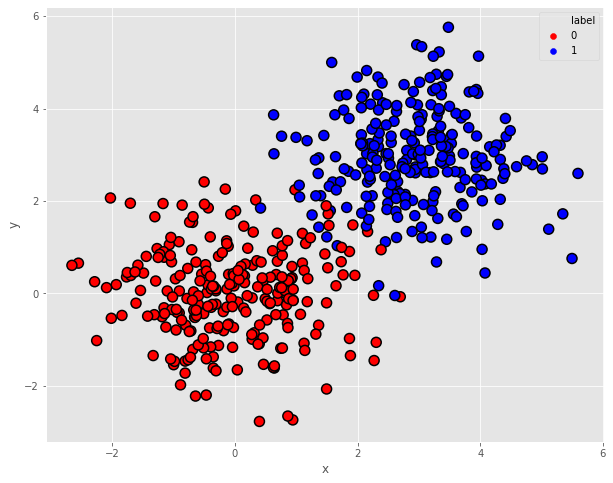

In [8]:
from sklearn.datasets import make_blobs
import seaborn as sns
np.random.seed(0)
### WRITE YOUR CODE HERE ###
centers = [[0,0],[3,3]]
X,labels = make_blobs(n_samples=500,centers=centers)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=labels))
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
sns.scatterplot(x='x', y='y', data=df, hue='label', s=100, edgecolor='black', linewidth=1.5, palette=['red','blue'])
plt.show()


<b>Exercise 4:</b>

Write a function 'find_best_split(x,y)' that gets two input vectors $x \in \mathbb{R}^d$ and $y \in \{0,1\}^d$. This function should return the threshold $t \in x$ with the best split. <b>Hint:</b> Use the function 'info_gain' from exercise 2.

In [19]:
def find_best_split(x,y):
    ### WRITE YOUR CODE HERE ###
    total_labels = len(y)
    info_gains = []
    for i in range(total_labels):
        #print(i)
        info_gains.append(info_gain(x,y,x[i]))
    #print(info_gains)
    return x[(np.argmax(info_gains))]
    pass

In [20]:
find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]))

5

Check if your solution is correct:

In [21]:
try:
    assert find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0])) == 5
    assert find_best_split(np.array([1,2,2,4,5,6,7,8,9,10]),np.array([1,1,0,0,1,0,0,1,0,0])) == 8    
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b>Exercise 5:</b>

* Find the best splitting for the two dimensions of the data set created in exercise 3. Plot the boundaries in a figure. Your figure should look like this:
<img src="figures/split.png" width="600"/>
* Which split would you prefer, and why?

In [22]:
x_best = find_best_split(X[:,0],labels)
y_best = find_best_split(X[:,1],labels)
### choose split with higher gain ratio ###
print(x_best)
print(y_best)

gain_ratio_x = info_gain(X[:,0],labels,x_best) / entropy(labels[:x_best])
gain_ratio_y = info_gain(X[:,1],labels,y_best) / entropy(labels[:y_best])

print(gain_ratio_x)
print(gain_ratio_y)

0.8345034467426031
0.8918534156264775


TypeError: slice indices must be integers or None or have an __index__ method

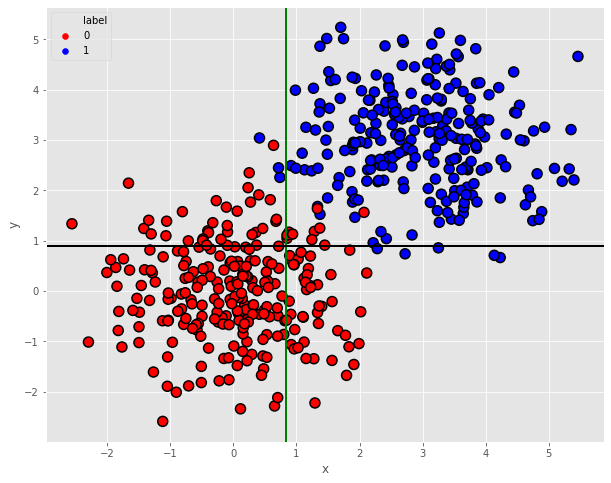

In [23]:
from sklearn.datasets import make_blobs
import seaborn as sns
### WRITE YOUR CODE HERE ###
centers = [[0,0],[3,3]]
X,labels = make_blobs(n_samples=500,centers=centers)



df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=labels))
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
sns.scatterplot(x='x', y='y', data=df, hue='label', s=100, edgecolor='black', linewidth=1.5, palette=['red','blue'])
plt.axvline(x=x_best, linewidth=2, color='green')
plt.axhline(y=y_best, linewidth=2, color='black')
plt.show()

## Train a Decision Tree
Now we train a decision tree using the sklearn package:

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf_tree.fit(X, labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<b>Exercise 6:</b>
* Calculate the predictions for all instances from the training set (use the function predict). Which instances are misclassified? Create a plot that shows which instances are correctly classified and which instances are misclassified. This figure should look like this:
<img src="figures/dec.png" width="600"/>
* Can you find learning parameter for the decision tree classifier (max_depth,min_samples_leaf,max_leaf_nodes,...) to get a classifier that classifies all instances correctly?

In [62]:
### WRITE YOUR CODE HERE ###
y_pred = clf_tree.predict(X)